In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from joblib import load
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
import random
df = load("../../preprocessing/clustering_data.joblib")
df.head()

,pca_0,pca_1
0,0.751095,0.480033
1,0.666295,0.486975
2,0.693642,0.494915
3,0.465188,0.431669
4,0.645849,0.529784


In [2]:
df.describe()

,pca_0,pca_1
count,1500.000000,1500.000000
mean,0.430761,0.457253
std,0.196214,0.165613
min,0.000000,0.000000
25%,0.286463,0.336472
50%,0.419752,0.457692
75%,0.555506,0.568831
max,1.000000,1.000000


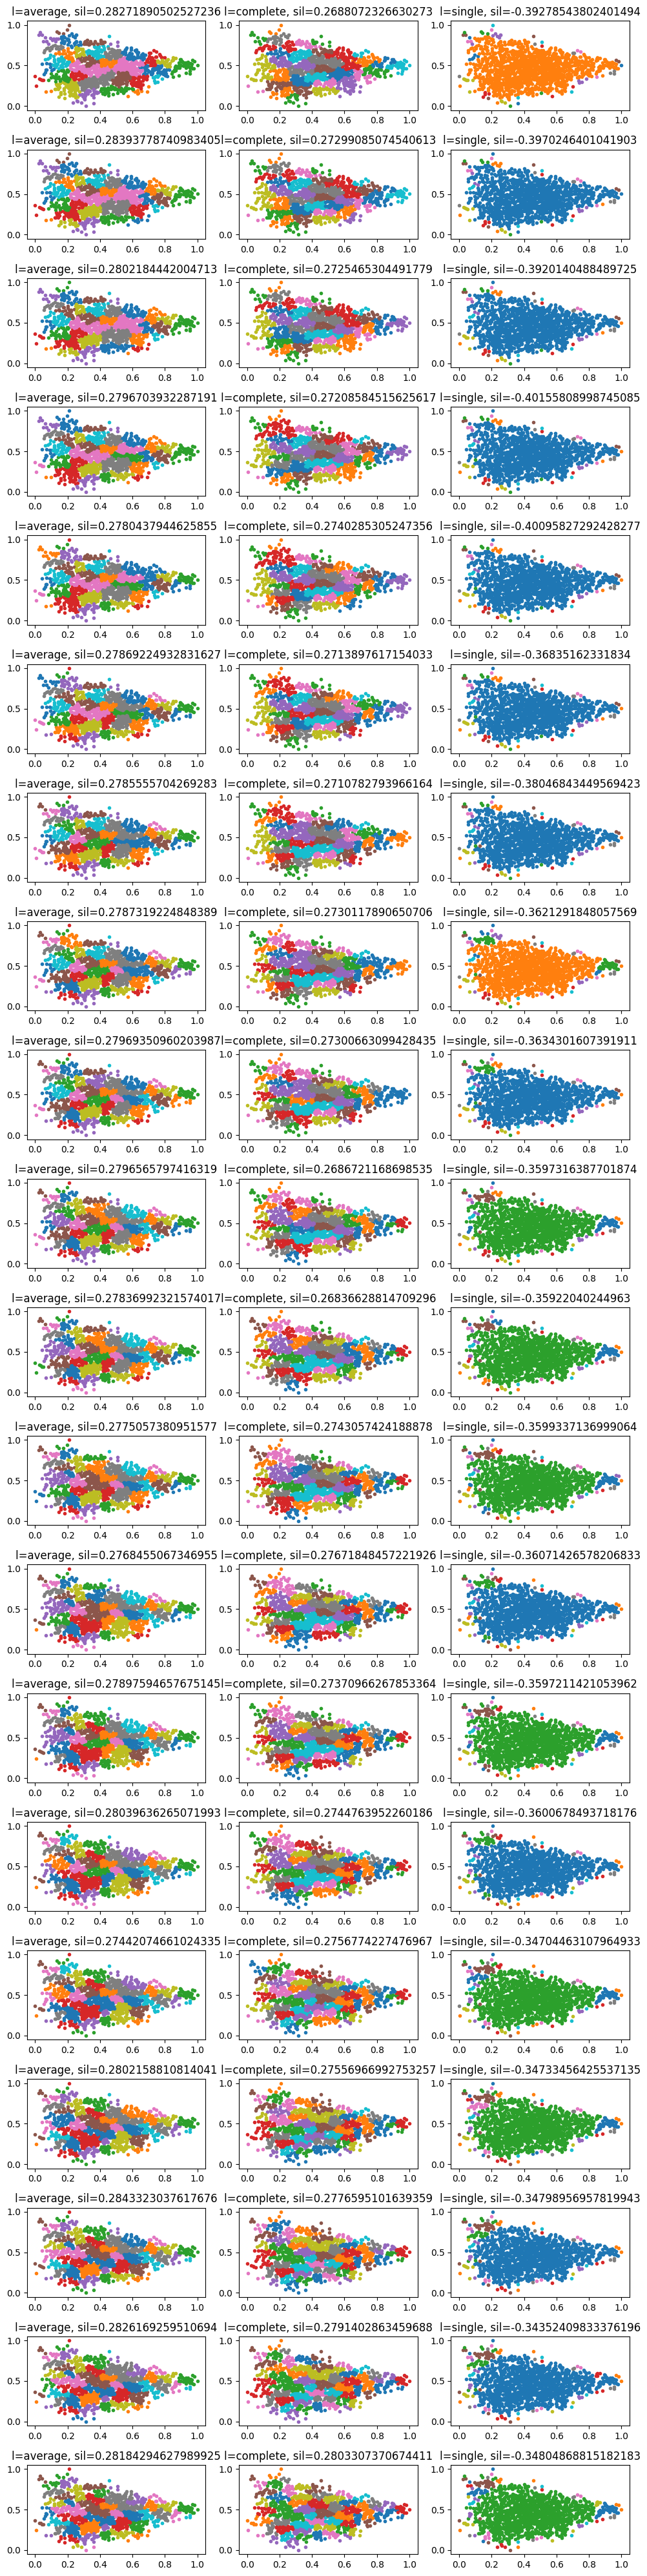

In [3]:
num_of_clusters = range(40,60)
linkages = ['average', 'complete', 'single']

fig = plt.figure(figsize=(10,40))
plot_index = 1
silhouettes = []

for cluster_num in num_of_clusters:
  for linkage in linkages:
    model = AgglomerativeClustering(n_clusters=cluster_num, linkage=linkage)
    model.fit(df)

    if linkage == 'average':
      silhouettes.append(silhouette_score(df, model.labels_))

    fig.add_subplot(len(num_of_clusters), len(linkages), plot_index)
    plot_index += 1
    for cluster_label in range(cluster_num):
      cluster = df[cluster_label == model.labels_]
      plt.scatter(cluster['pca_0'], cluster['pca_1'], label=f'cluster {cluster_label}', marker='.')
    plt.title(f'l={linkage}, sil={silhouette_score(df, model.labels_)}')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Silhouette Score')

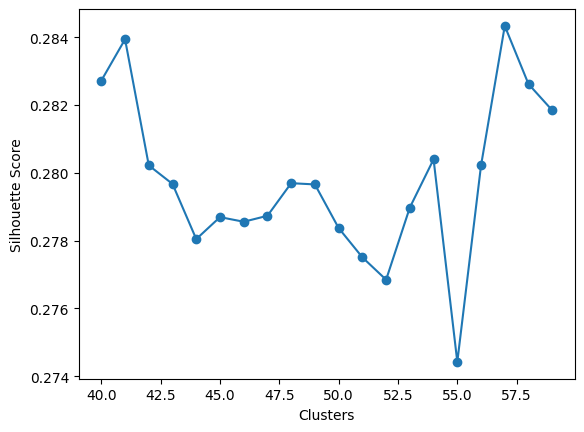

In [4]:
plt.plot(num_of_clusters, silhouettes, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')

In [5]:
model = AgglomerativeClustering(n_clusters=50, linkage='average', compute_distances=True)
model.fit(df)

AgglomerativeClustering(compute_distances=True, linkage='average',
                        n_clusters=50)

In [6]:
model.children_

array([[  33,   34],
       [  63,   64],
       [1267, 1268],
       ...,
       [2993, 2995],
       [2989, 2996],
       [2980, 2997]])

In [7]:
model.distances_

array([0.        , 0.        , 0.        , ..., 0.33300331, 0.4412624 ,
       0.49941276])

In [9]:
# Z = linkage(df.values, method='average')
# _ = dendrogram(Z)